In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import moduleprojet5
from moduleprojet5 import *
from timeit import default_timer as timer

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Travail\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


SELECT TOP 30000 Title, Body, Tags, Id, Score, ViewCount, AnswerCount, CreationDate
FROM Posts 
WHERE ViewCount IS NOT NULL
AND AnswerCount > 0 AND LEN(Tags) >= 75 AND CreationDate > '2020-01-01 00:00:00' AND LEN(Body) > 1000

In [3]:
data_T0 = pd.read_csv("QueryResults.csv")
samplesize = 5000
data_T0 = data_T0[:samplesize]
print(data_T0.shape)

(5000, 8)


In [4]:
data_T0

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,CreationDate
0,Randomized QuickSort IndexOutOfBounds exception,<p>this is the QuickSort Randomized that I've ...,<java><random><quicksort><indexoutofboundsexce...,68940699,1,52,1,2021-08-26 14:45:15
1,Conditional rendering between 3 page component...,<p>I want to know if conditional rendering bet...,<reactjs><react-router><conditional-statements...,68940832,2,154,1,2021-08-26 14:52:08
2,terraform create k8s secret from gcp secret,<p>I have managed to achieve the flow of creat...,<google-cloud-platform><terraform><kubernetes-...,68941378,0,1867,1,2021-08-26 15:28:42
3,test the id shouldnt be in response body,<p>hey guys im new in postman</p>\n<p>this is ...,<javascript><automation><postman><postman-coll...,68942267,0,491,3,2021-08-26 16:29:53
4,Generate DID in ION SIDETREE testnet,<p>I have succeeded deploy the ION SIDETREE te...,<blockchain><bitcoind><decentralized-applicati...,68943483,1,282,1,2021-08-26 18:10:41
...,...,...,...,...,...,...,...,...
4995,DiffUtil Not working in nested recyclerview Ko...,<p>I have two recycler views. My view is not u...,<android><kotlin><android-recyclerview><androi...,70095578,0,1421,2,2021-11-24 11:49:26
4996,How to store data correspondingly with user id...,<p>I'm a newbie in React Native and struggling...,<reactjs><react-native><firebase-authenticatio...,61041995,1,2990,2,2020-04-05 11:40:38
4997,Is it correct way having status or Summary col...,"<p>My Parent Table is ""Jobs"" table, and there ...",<sql><database-design><query-optimization><dat...,61042305,0,34,1,2020-04-05 12:05:39
4998,How to access chrome extension local storage d...,<p>I'm building a chrome extension to autologi...,<javascript><google-chrome-extension><local-st...,70096610,-3,2164,1,2021-11-24 13:03:31


In [5]:
print(data_T0.iloc[1]["Tags"][1:-1].rsplit("><"))

['reactjs', 'react-router', 'conditional-statements', 'rendering', 'conditional-rendering']


In [6]:
help(moduleprojet5)

Help on module moduleprojet5:

NAME
    moduleprojet5 - # Tokenizer

FUNCTIONS
    bert_inp_fct(sentences, bert_tokenizer, max_length)
    
    bracket_exterminator(sentence)
    
    code_exterminator(sentence)
    
    lemma_fct(list_words)
    
    lower_start_fct(list_words)
        # lower case et alpha
    
    stop_word_filter_fct(list_words)
    
    tokenizer_fct(sentence)
    
    transform_bow_fct(desc_text)
        # Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
    
    transform_bow_lem_fct(desc_text)
        # Fonction de préparation du texte pour le bag of words avec lemmatization
    
    transform_dl_fct(desc_text)
        # Fonction de préparation du texte pour le Deep learning (USE et BERT)
    
    transform_dl_fct2(desc_text)

DATA
    stop_w = ["didn't", 'through', "you'd", 'under', 'you', 'too', "should...
    stopwords = <WordListCorpusReader in 'C:\\Users\\Travail\\AppData\\Roa...

FILE
    c:\users\travail\documen

In [7]:
# Select our tags, represented as strings, and transform them into arrays of tags
start = timer()
tags = data_T0["Tags"]
clean_tags = tags.str.split("><").apply(
    lambda x: [a.strip("<").strip(">") for a in x])

# Use pandas' get_dummies to get dummy values 
# select only tags that appear over 500 times
tag_columns = pd.get_dummies(clean_tags.apply(pd.Series).stack()).groupby(level=0).sum()
all_tags = tag_columns.copy().astype(bool).sum(axis=0).sort_values(ascending=False)
top_tags = all_tags[all_tags > samplesize//80]
top_tag_columns = tag_columns[top_tags.index]

data_T1 = pd.concat([data_T0, top_tag_columns], axis=1)

end = timer()
print(end - start)

data_T1.head()



1.2605407


,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,CreationDate,android,google-cloud-platform,...,apache-kafka,selenium-chromedriver,tensorflow,azure-web-app-service,azure-pipelines,android-jetpack-compose,entity-framework-core,deep-learning,docker,apache-spark
0,Randomized QuickSort IndexOutOfBounds exception,<p>this is the QuickSort Randomized that I've ...,<java><random><quicksort><indexoutofboundsexce...,68940699,1,52,1,2021-08-26 14:45:15,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Conditional rendering between 3 page component...,<p>I want to know if conditional rendering bet...,<reactjs><react-router><conditional-statements...,68940832,2,154,1,2021-08-26 14:52:08,0,0,...,0,0,0,0,0,0,0,0,0,0
2,terraform create k8s secret from gcp secret,<p>I have managed to achieve the flow of creat...,<google-cloud-platform><terraform><kubernetes-...,68941378,0,1867,1,2021-08-26 15:28:42,0,1,...,0,0,0,0,0,0,0,0,0,0
3,test the id shouldnt be in response body,<p>hey guys im new in postman</p>\n<p>this is ...,<javascript><automation><postman><postman-coll...,68942267,0,491,3,2021-08-26 16:29:53,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Generate DID in ION SIDETREE testnet,<p>I have succeeded deploy the ION SIDETREE te...,<blockchain><bitcoind><decentralized-applicati...,68943483,1,282,1,2021-08-26 18:10:41,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn import model_selection
data_Train, data_Test = model_selection.train_test_split(data_T1,random_state=0)

sample_size = samplesize//10


In [9]:


start = timer()
data_Train['Body'] = data_Train['Body'].apply(lambda x : moduleprojet5.code_exterminator(x))
data_Train['Text'] = data_Train['Title'] #+ " " + data_T['Body']
data_Train['Text'] = data_Train['Text'].apply(lambda x : bracket_exterminator(x))
data_Train['sentence_bow'] = data_Train['Text'].apply(lambda x : transform_bow_fct(x))
data_Train['sentence_bow_lem'] = data_Train['Text'].apply(lambda x : transform_bow_lem_fct(x))
data_Train['sentence_dl'] = data_Train['Text'].apply(lambda x : transform_dl_fct2(x))
end = timer()
print(end - start)

2.180688999999999


In [10]:
tag = 'android'
data_Tneg = data_Train[data_Train[tag]==0.0].iloc[0:sample_size//2]
data_Tpos = data_Train[data_Train[tag]==1.0].iloc[0:sample_size//2]
data_T = pd.concat((data_Tneg, data_Tpos), axis=0)
print(data_T)

                                                  Title  \
4154  How to properly use firebase in js, without ex...   
4820  Best way to cluster long/lat hotspot points in...   
1202  Tensorflow object detection -- Increasing batc...   
3759  Deploying via Google Cloud build trigger "sh: ...   
622   Test GCP publisher retry settings in Spring ap...   
...                                                 ...   
3022  Android Command line tools sdkmanager always s...   
1854  Coroutines, async DiffUtil and Inconsistency d...   
2986  How do I remove this firebase listener in OnDe...   
3083  Adding barriers programmatically via Constrain...   
52    error: index.js: Cannot find module 'babel-plu...   

                                                   Body  \
4154  <p>I am trying to use firebase with firebase h...   
4820  <p>I am new to R and (unsupervised) machine le...   
1202  <p>I have been trying to train an object detec...   
3759  <p>I'am deploying a nodejs application in the ...

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize

data_T['length_bow'] = data_T['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_T['length_bow'].max())
data_T['length_dl'] = data_T['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_T['length_dl'].max())

max length bow :  16
max length dl :  30


In [13]:
l_cat = list(set(data_T[tag]))
y_cat_num = [(1-l_cat.index(data_T.iloc[i][tag])) for i in range(len(data_T))]

In [14]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=50, max_iter=2000, 
                                 init='random', learning_rate=100, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des tweets par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des tweets par clusters')
    
    plt.show()
    print("ARI : ", ARI)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(data_T[feat])
ctf_fit = ctf.fit(data_T[feat])

cv_transform = cvect.transform(data_T[feat])  
ctf_transform = ctf.transform(data_T[feat])  

In [16]:
print(data_T.iloc[5]['sentence_bow_lem'])

drf simple jwt error detail active account found given credential


In [17]:

print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)


CountVectorizer : 
-----------------
ARI :  0.3033 time :  2.0

Tf-idf : 
--------
ARI :  0.1583 time :  3.0


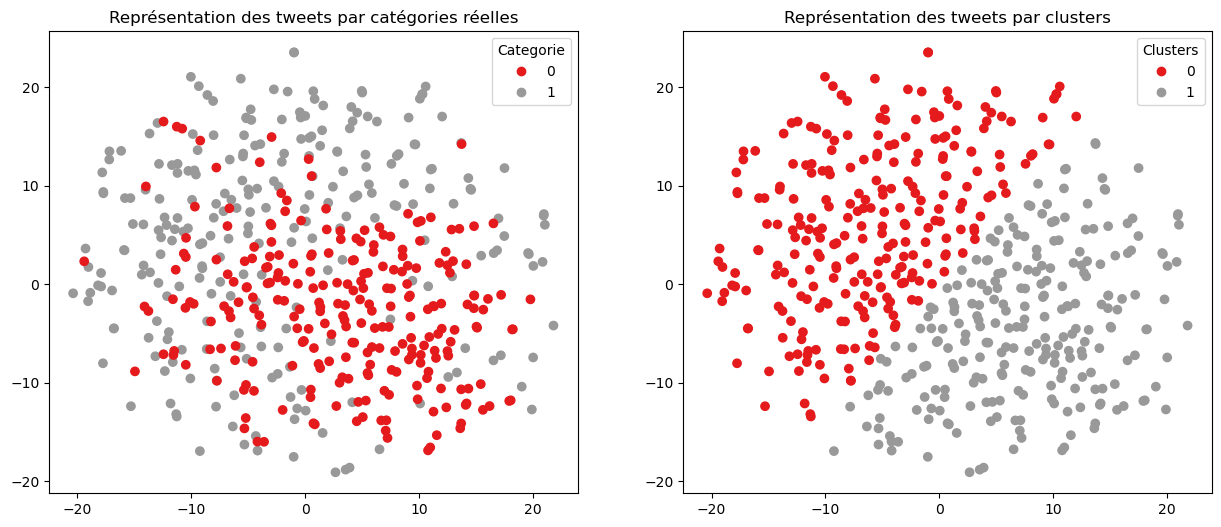

ARI :  0.1583


In [18]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [19]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [20]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data_T['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [21]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=11)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 1370
Word2Vec trained


In [22]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 1371


In [23]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (1371, 300)


In [24]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix]
                        )(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           411300    
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 411,300
Trainable params: 411,300
Non-trainable params: 0
_________________________________________________________________


In [25]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

16/16 [==============================] - 0s 752us/step


(500, 300)

In [26]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.0021 time :  3.0


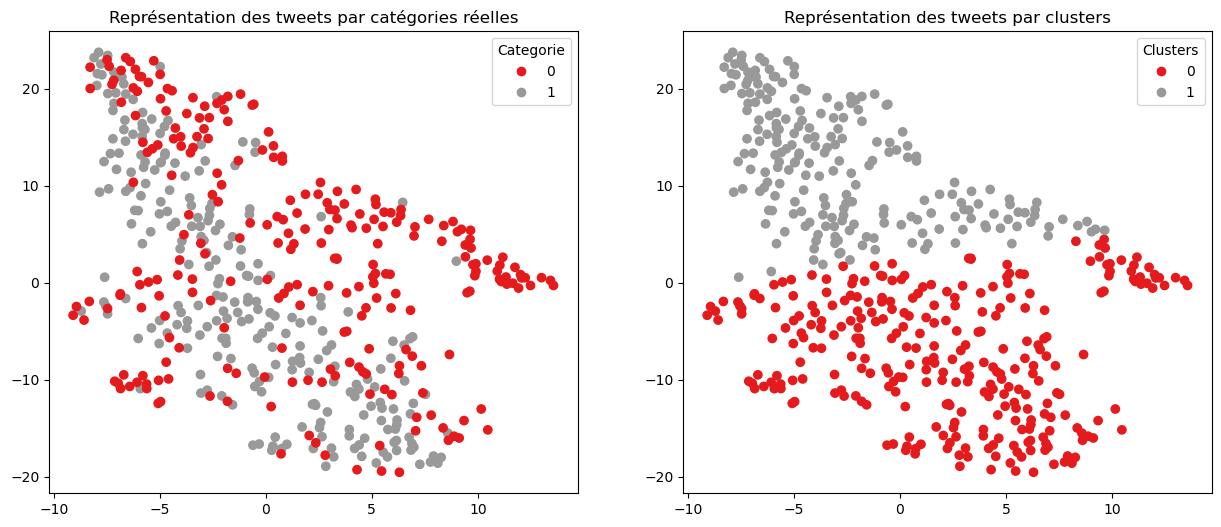

ARI :  0.0021


In [27]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [28]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

C:\Users\Travail\anaconda3\lib\site-packages\transformers\deepspeed.py:24: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


In [29]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.1
2.10.1
Num GPUs Available:  1
True


In [30]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [31]:
start = timer()
max_length = 150
batch_size = 10
model_type = 'bert-base-cased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_T['Text'].to_list()
end = timer()
print(end - start)

loading configuration file config.json from cache at C:\Users\Travail\.cache\huggingface\hub\models--bert-base-cased\snapshots\cd5ef92a9fb2f889e972770a36d4ed042daf221e\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file model.safetensors from cache at C:\Users\Travail\.cache\huggingface\hub\models--bert-base-cased\snapshots\cd5ef92a9fb2f889e972770a36d4ed042d

0.8436063999999988


In [32]:
sentences[0]

'How to properly use firebase in js, without exposing database to users?'

In [33]:
start = timer()
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')
end = timer()
print(end - start)

loading configuration file config.json from cache at C:\Users\Travail\.cache\huggingface\hub\models--bert-base-cased\snapshots\cd5ef92a9fb2f889e972770a36d4ed042daf221e\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading file vocab.txt from cache at C:\Users\Travail\.cache\huggingface\hub\models--bert-base-cased\snapshots\cd5ef92a9fb2f889e972770a36d4ed042daf221e\vocab.txt

1/1 [==============================] - 0s 18ms/step
temps traitement :  8.0
8.375789600000004


In [34]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.0834 time :  4.0


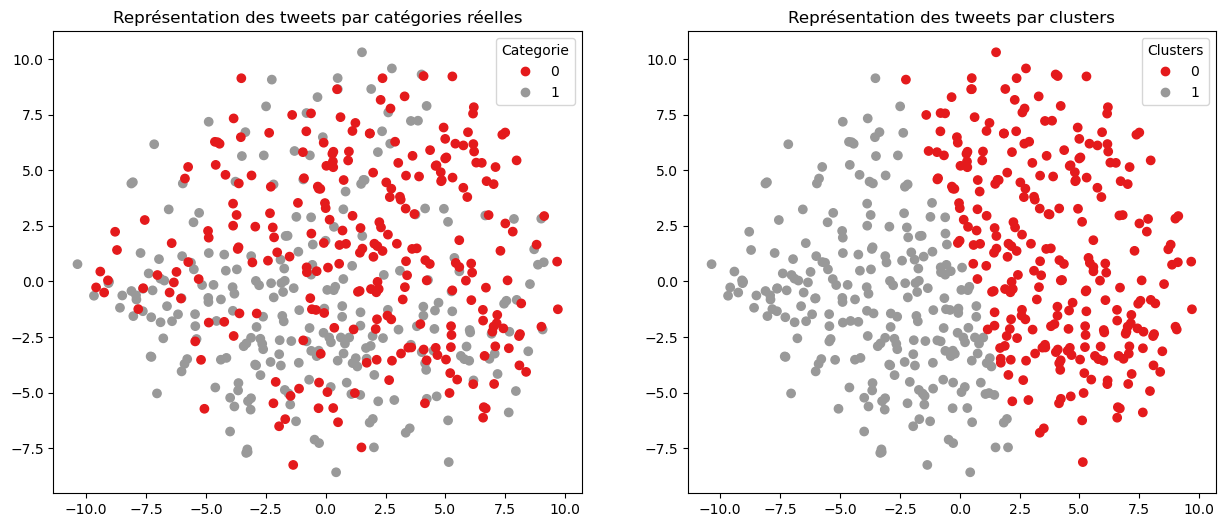

ARI :  0.0834


In [35]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [36]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [37]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [38]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.1
2.10.1
Num GPUs Available:  1
True


In [39]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [40]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [41]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        #with tf.device('/CPU:0'):
        #    feat = embed(sentences[idx:idx+batch_size])
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [42]:
batch_size = 10
sentences = data_T['sentence_dl'].to_list()

In [43]:
start = timer()
features_USE = feature_USE_fct(sentences, batch_size)
end = timer()
print(end - start)

1.4301292999999973


In [44]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4345 time :  3.0


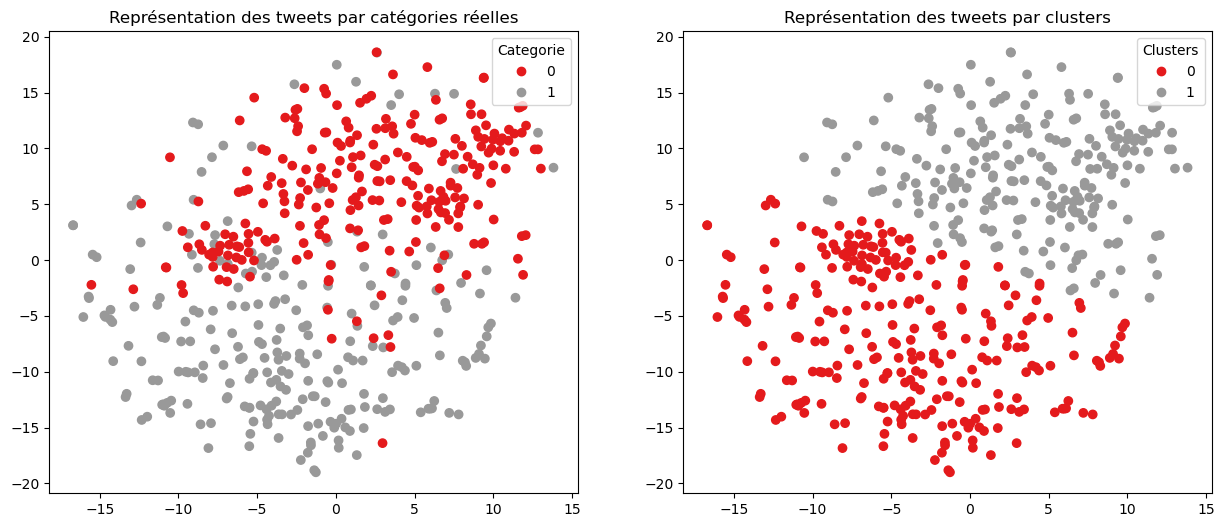

ARI :  0.4345


In [45]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [46]:
data_Train['Text'] = data_Train['Title'] + " " + data_Train['Body']
data_Train['Text'] = data_Train['Text'].apply(lambda x : code_exterminator(x))
data_Train['Text'] = data_Train['Text'].apply(lambda x : bracket_exterminator(x))
data_Train['sentence_dl'] = data_Train['Text'].apply(lambda x : transform_dl_fct2(x))

In [47]:
data_Train['sentence_dl'][0]

"Randomized QuickSort IndexOutOfBounds exception this is the QuickSort Randomized that I've come up with, but it constantly throws out IndexOutOfBounds exception. Could I have some help with it? Thanks!\nthiRandomi"

In [48]:
data_wanted = data_Train.drop(columns=["Title","Body","Tags","Id","Score","ViewCount","AnswerCount","Text","sentence_dl","sentence_bow","sentence_bow_lem","CreationDate"]).copy()

In [49]:
features_USE = feature_USE_fct(data_Train['sentence_dl'].to_list(), batch_size)

In [50]:
data_Test['Text'] = data_Test['Title'] + " " + data_Test['Body']
data_Test['Text'] = data_Test['Text'].apply(lambda x : code_exterminator(x))
data_Test['Text'] = data_Test['Text'].apply(lambda x : bracket_exterminator(x))
data_Test['sentence_bow'] = data_Test['Text'].apply(lambda x : transform_bow_fct(x))
data_Test['sentence_bow_lem'] = data_Test['Text'].apply(lambda x : transform_bow_lem_fct(x))
data_Test['sentence_dl'] = data_Test['Text'].apply(lambda x : transform_dl_fct2(x))

In [51]:
batch_size = 10
sentences_test = data_Test['sentence_dl'].to_list()

features_USE_Test = feature_USE_fct(sentences_test, batch_size)

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, data_Train['Text'].to_list(), 
                                                         max_length, batch_size, mode='HF')
sentences_test_bert = data_Test['Text'].to_list()
features_bert_Test, last_hidden_states_tot_Test = feature_BERT_fct(model, model_type, sentences_test_bert, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\Travail\.cache\huggingface\hub\models--bert-base-cased\snapshots\cd5ef92a9fb2f889e972770a36d4ed042daf221e\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading file vocab.txt from cache at C:\Users\Travail\.cache\huggingface\hub\models--bert-base-cased\snapshots\cd5ef92a9fb2f889e972770a36d4ed042daf221e\vocab.txt

1/1 [==============================] - 0s 18ms/step


C:\Users\Travail\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


loading configuration file config.json from cache at C:\Users\Travail\.cache\huggingface\hub\models--bert-base-cased\snapshots\cd5ef92a9fb2f889e972770a36d4ed042daf221e\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading file vocab.txt from cache at C:\Users\Travail\.cache\huggingface\hub\models--bert-base-cased\snapshots\cd5ef92a9fb2f889e972770a36d4ed042daf221e\vocab.txt

temps traitement :  77.0
1/1 [==============================] - 0s 16ms/step
temps traitement :  14.0


In [52]:
from sklearn.neighbors import KNeighborsClassifier

start = timer()
top_tags = top_tag_columns.head() 
KNC_USE = KNeighborsClassifier()
KNC_USE.fit(features_USE,data_wanted)
end = timer()
print(end - start)

0.0081057999999814


In [53]:
y_true = data_Test.drop(columns=["Title","Body","Tags","Id","Score","ViewCount","AnswerCount","Text","sentence_dl","CreationDate",'sentence_bow','sentence_bow_lem']).copy()

start = timer()
y_pred_KNC_USE = KNC_USE.predict(features_USE_Test)
y_pred_KNC_USE = pd.DataFrame(y_pred_KNC_USE,columns=y_true.columns)
end = timer()
print(end - start)

0.059818999999976086


In [54]:
import sklearn
sklearn.metrics.accuracy_score(y_pred_KNC_USE,y_true)

0.3032

In [55]:
sklearn.metrics.jaccard_score(y_pred_KNC_USE,y_true,average="weighted")

0.46788222490400755

In [56]:
y_pred_proba_KNC_USE = KNC_USE.predict_proba(features_USE_Test)
y_pred_proba_KNC_USE

[array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [0.6, 0.4],
        [1. , 0. ],
        [1. , 0. ]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1. , 0. ],
        [0.8, 0.2],
        [1. , 0. ],
        ...,
        [0.8, 0.2],
        [1. , 0. ],
        [1. , 0. ]]),
 array([[1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [1. , 0. ],
        [0.8, 0.2],
        [1. , 0. ]]),
 array([[0.4, 0.6],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [0.8, 0.2],
        [1. , 0. ],
        [1. , 0. ]]),
 array([[1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [0.8, 0.2],
        [1. , 0. ],
        [1. , 0. ]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1.,

In [57]:
y_pred_proba_KNC_USE[0]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [58]:
sklearn.metrics.multilabel_confusion_matrix(y_true, y_pred_KNC_USE)

array([[[1016,   34],
        [  41,  159]],

       [[1116,   23],
        [  69,   42]],

       [[1115,   29],
        [  27,   79]],

       [[1113,   27],
        [  69,   41]],

       [[1137,   15],
        [  75,   23]],

       [[1142,    8],
        [  28,   72]],

       [[1187,    5],
        [  49,    9]],

       [[1183,   15],
        [  20,   32]],

       [[1192,    2],
        [  42,   14]],

       [[1198,    9],
        [  22,   21]],

       [[1181,   12],
        [  27,   30]],

       [[1188,   11],
        [  38,   13]],

       [[1196,    8],
        [  37,    9]],

       [[1192,   22],
        [  14,   22]],

       [[1212,    8],
        [  27,    3]],

       [[1208,    6],
        [  31,    5]],

       [[1209,    6],
        [   4,   31]],

       [[1197,   15],
        [  28,   10]],

       [[1213,    6],
        [   9,   22]],

       [[1224,    1],
        [  11,   14]],

       [[1213,    8],
        [  22,    7]],

       [[1213,   13],
        [   

In [59]:
start = timer()
KNC_Bert = KNeighborsClassifier()
KNC_Bert.fit(features_bert,data_wanted)

y_pred_KNC_Bert = KNC_Bert.predict(features_bert_Test)
y_pred_KNC_Bert = pd.DataFrame(y_pred_KNC_Bert,columns=y_true.columns)
end = timer()
print(end - start)

0.07830020000000104


In [60]:
sklearn.metrics.accuracy_score(y_pred_KNC_Bert,y_true)

0.18

In [61]:
sklearn.metrics.jaccard_score(y_pred_KNC_Bert,y_true,average="weighted")

0.15337244077802872

In [62]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
start = timer()
Ada = AdaBoostClassifier()
OvR_Ada_USE = OneVsRestClassifier(Ada,n_jobs = -1)
OvR_Ada_USE.fit(features_USE,data_wanted)

y_pred_Ada_USE = OvR_Ada_USE.predict(features_USE_Test)
end = timer()
print(end - start)
sklearn.metrics.accuracy_score(y_pred_Ada_USE,y_true)

33.77983639999999


0.2376

In [63]:
sklearn.metrics.jaccard_score(y_pred_Ada_USE,y_true,average="weighted")

0.36933383936797487

In [64]:
y_pred_proba_Ada_USE = OvR_Ada_USE.predict_proba(features_USE_Test)
y_pred_proba_Ada_USE

array([[0.4554612 , 0.45194301, 0.45175134, ..., 0.41456451, 0.24760124,
        0.44993428],
       [0.46625749, 0.47038381, 0.46485973, ..., 0.41509118, 0.21404267,
        0.33419444],
       [0.44811297, 0.46925787, 0.45720614, ..., 0.29301757, 0.23250845,
        0.58038342],
       ...,
       [0.40703286, 0.48416083, 0.45158994, ..., 0.21687367, 0.44013099,
        0.41741654],
       [0.4649887 , 0.46754436, 0.48196276, ..., 0.25440868, 0.36440335,
        0.3765905 ],
       [0.43584323, 0.473542  , 0.47774684, ..., 0.115093  , 0.23882593,
        0.36300792]])

In [65]:
y_pred_proba_Ada_USE[2]

array([0.44811297, 0.46925787, 0.45720614, 0.46656978, 0.42885624,
       0.46273904, 0.49010319, 0.44324695, 0.46434784, 0.4010434 ,
       0.42045369, 0.42207466, 0.41401063, 0.38234507, 0.37217644,
       0.43993273, 0.35479166, 0.4088787 , 0.25231695, 0.37945925,
       0.2684735 , 0.25277824, 0.44211237, 0.38844659, 0.34450669,
       0.43883151, 0.40580259, 0.46916971, 0.33203   , 0.40028891,
       0.38377211, 0.32740326, 0.40982594, 0.19428162, 0.35517465,
       0.38825656, 0.35805721, 0.23494965, 0.3047635 , 0.35330329,
       0.39197973, 0.36061627, 0.35261982, 0.39985319, 0.59980988,
       0.38200806, 0.41779863, 0.21174931, 0.27418137, 0.34593006,
       0.22593439, 0.29301757, 0.23250845, 0.58038342])

In [66]:
Ada = AdaBoostClassifier()
OvR_Ada_Bert = OneVsRestClassifier(Ada,n_jobs = -1)
start = timer()
OvR_Ada_Bert.fit(features_bert,data_wanted)

y_pred_Ada_Bert = OvR_Ada_Bert.predict(features_bert_Test)
end = timer()
print(end - start)
sklearn.metrics.accuracy_score(y_pred_Ada_Bert,y_true)


49.842292300000025


0.1472

In [67]:
sklearn.metrics.jaccard_score(y_pred_Ada_Bert,y_true,average="weighted")

0.16443131568651745

In [68]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
OvR_RFC_USE = OneVsRestClassifier(RFC,n_jobs = -1)
start = timer()
OvR_RFC_USE.fit(features_USE,data_wanted)

y_pred_RFC_USE = OvR_RFC_USE.predict(features_USE_Test)
end = timer()
print(end - start)
sklearn.metrics.accuracy_score(y_pred_RFC_USE,y_true)

16.6154521


0.232

In [69]:
sklearn.metrics.jaccard_score(y_pred_RFC_USE,y_true,average="weighted")

0.3622546367099014

In [70]:
y_pred_proba_RFC = OvR_RFC_USE.predict_proba(features_USE_Test)
y_pred_proba_RFC

array([[0.  , 0.08, 0.02, ..., 0.02, 0.02, 0.05],
       [0.04, 0.11, 0.04, ..., 0.03, 0.01, 0.02],
       [0.01, 0.14, 0.  , ..., 0.  , 0.01, 0.36],
       ...,
       [0.  , 0.27, 0.03, ..., 0.  , 0.04, 0.05],
       [0.03, 0.03, 0.04, ..., 0.  , 0.01, 0.  ],
       [0.02, 0.06, 0.01, ..., 0.02, 0.01, 0.02]])

In [71]:
RFC = RandomForestClassifier()
OvR_RFC_Bert = OneVsRestClassifier(RFC,n_jobs = -1)
start = timer()
OvR_RFC_Bert.fit(features_bert,data_wanted)

y_pred_RFC_Bert = OvR_RFC_Bert.predict(features_bert_Test)
end = timer()
print(end - start)
sklearn.metrics.accuracy_score(y_pred_RFC_Bert,y_true)

30.50577659999999


0.1768

In [72]:
sklearn.metrics.jaccard_score(y_pred_RFC_Bert,y_true,average="weighted")

0.0678574449190172

In [73]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

SVC = SVC()#probability=True)
OvR_SVC = OneVsRestClassifier(SVC,n_jobs = -1)
start = timer()
OvR_SVC.fit(features_USE,data_wanted)

y_pred_SVC = OvR_SVC.predict(features_USE_Test)
end = timer()
print(end - start)
sklearn.metrics.accuracy_score(y_pred_SVC,y_true)

11.901941099999988


0.3048

In [74]:
sklearn.metrics.jaccard_score(y_pred_SVC,y_true,average="weighted")

0.5211529226043561

In [75]:
indice = 10

display(y_pred_SVC[indice])
pd.set_option('display.max_rows', None)
display(y_true.iloc[indice])
data_Test.iloc[indice]["sentence_dl"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

android                       0
google-cloud-platform         0
firebase                      0
python                        0
javascript                    0
amazon-web-services           0
java                          0
google-cloud-functions        0
google-cloud-firestore        0
firebase-realtime-database    0
react-native                  0
azure                         0
reactjs                       0
firebase-authentication       0
node.js                       0
kotlin                        0
google-sheets                 0
machine-learning              0
android-recyclerview          0
angular                       0
c#                            0
azure-active-directory        0
spring-boot                   0
asp.net-core                  0
android-fragments             0
kubernetes                    0
azure-devops                  0
python-3.x                    0
django                        0
typescript                    0
aws-lambda                    0
flutter 

'Widget title not showing up in my custom WordPress theme I have created a custom theme in my WordPress install. I have added sidebar in it.\nMy code for adding the sidebar is\nIn functions.php\nWidget '

In [76]:
import ipytest
ipytest.autoconfig()

In [77]:
%%ipytest -qq

def test_example():
    assert [1, 2, 3] == [1, 2, 3]

def sumtest(a,b):
    return a + b

.                                                                                            [100%]


In [78]:
%%ipytest -qq

def inc(x):
    return x + 1


def test_answer():
    assert inc(3) == 5

F                                                                                            [100%]
============================================ FAILURES =============================================
___________________________________________ test_answer ___________________________________________

    def test_answer():
>       assert inc(3) == 5
E       assert 4 == 5
E        +  where 4 = inc(3)

C:\Users\Travail\AppData\Local\Temp\ipykernel_119828\1046244620.py:6: AssertionError
===================================== short test summary info =====================================
FAILED t_9e86886faed04b14b56b96948143dc96.py::test_answer - assert 4 == 5


truncate svd pour test/entrainement

bert tester la métrique d'évaluation

héberge sur streamlit, heroku

topic modeling, kmeans pour méthode non supervisée
pour non supervisé: trouver une solution pour passer d'un cluster à un theme

bien définir la métrique de performance
combien de tags ? peu de tags mais être certain ou beaucoup de tags pour être surs d'en avoir au moins un correct

pour nettoyage, une sorte de gridsearch, fréquence de mots, exclure verbes ? tags ? preprocessing pour gagner en perfomance

In [81]:
sklearn.metrics.multilabel_confusion_matrix(y_true, y_pred_SVC)

array([[[1025,   25],
        [  47,  153]],

       [[1130,    9],
        [  77,   34]],

       [[1130,   14],
        [  36,   70]],

       [[1132,    8],
        [  83,   27]],

       [[1149,    3],
        [  93,    5]],

       [[1148,    2],
        [  29,   71]],

       [[1192,    0],
        [  58,    0]],

       [[1196,    2],
        [  27,   25]],

       [[1194,    0],
        [  52,    4]],

       [[1201,    6],
        [  20,   23]],

       [[1192,    1],
        [  36,   21]],

       [[1198,    1],
        [  48,    3]],

       [[1204,    0],
        [  42,    4]],

       [[1209,    5],
        [  18,   18]],

       [[1220,    0],
        [  30,    0]],

       [[1214,    0],
        [  36,    0]],

       [[1213,    2],
        [   9,   26]],

       [[1205,    7],
        [  27,   11]],

       [[1215,    4],
        [  13,   18]],

       [[1223,    2],
        [  11,   14]],

       [[1221,    0],
        [  28,    1]],

       [[1224,    2],
        [  1

In [82]:
#y_pred_proba_SVC = OvR.predict_proba(features_USE_Test)
#y_pred_proba_SVC

In [83]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
tfidf_fit = tfidf.fit_transform(data_Train['sentence_bow_lem'])

tfidf_test = tfidf.transform(data_Test['sentence_bow_lem'])

In [84]:
tfidf_test

<1250x4960 sparse matrix of type '<class 'numpy.float64'>'
	with 27622 stored elements in Compressed Sparse Row format>

In [85]:
KNC_Bag = KNeighborsClassifier()
start = timer()
KNC_Bag.fit(tfidf_fit,data_wanted)

y_pred_KNC_Bag = KNC_Bag.predict(tfidf_test)
y_pred_KNC_Bag = pd.DataFrame(y_pred_KNC_Bag,columns=y_true.columns)
end = timer()
print(end - start)

sklearn.metrics.accuracy_score(y_pred_KNC_Bag,y_true)

0.09298639999997249


0.2624

In [86]:
sklearn.metrics.jaccard_score(y_pred_KNC_Bag,y_true,average="weighted")

0.3768817120500188

In [87]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data_Train['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [88]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=11)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4611
Word2Vec trained


In [89]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4612


In [90]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4612, 300)


In [91]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix]
                        )(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 24, 300)           1383600   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,383,600
Trainable params: 1,383,600
Non-trainable params: 0
_________________________________________________________________


In [92]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

118/118 [==============================] - 0s 586us/step


(3750, 300)

In [93]:
sklearn.metrics.log_loss(y_pred_KNC_Bert, y_pred_KNC_USE)

C:\Users\Travail\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


5.420965469723219

In [94]:
y_pred_KNC_USE

,android,google-cloud-platform,firebase,python,javascript,amazon-web-services,java,google-cloud-functions,google-cloud-firestore,firebase-realtime-database,...,apache-kafka,selenium-chromedriver,tensorflow,azure-web-app-service,azure-pipelines,android-jetpack-compose,entity-framework-core,deep-learning,docker,apache-spark
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
y_pred_KNC_Bert['android']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      1
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      1
54      0
55      0
56      0
57      0
58      0
59      1
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      1
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [96]:
data1 = []
for col in y_pred_KNC_Bert.columns:
    data1 = data1 + y_pred_KNC_Bert[col].tolist()

data2 = []
for col in y_pred_KNC_USE.columns:
    data2 = data2 + y_pred_KNC_USE[col].tolist()

sklearn.metrics.adjusted_rand_score(data1,data2)

0.18614581824669174

In [97]:
data1 = []
for col in y_pred_KNC_Bag.columns:
    data1 = data1 + y_pred_KNC_Bag[col].tolist()

data2 = []
for col in y_pred_KNC_USE.columns:
    data2 = data2 + y_pred_KNC_USE[col].tolist()

sklearn.metrics.adjusted_rand_score(data1,data2)

0.5239786489921929

In [98]:
data1 = []
for col in y_pred_KNC_Bag.columns:
    data1 = data1 + y_pred_KNC_Bag[col].tolist()

data2 = []
for col in y_pred_KNC_Bert.columns:
    data2 = data2 + y_pred_KNC_Bert[col].tolist()

sklearn.metrics.adjusted_rand_score(data1,data2)

0.19244021749964724

In [99]:
y_pred_SVC = pd.DataFrame(y_pred_SVC,columns=y_true.columns)
data1 = []
for col in y_pred_SVC.columns:
    data1 = data1 + y_pred_SVC[col].tolist()

data2 = []
for col in y_pred_KNC_USE.columns:
    data2 = data2 + y_pred_KNC_USE[col].tolist()

sklearn.metrics.adjusted_rand_score(data1,data2)

0.6607060373890962

In [100]:
import mlflow

mlflow.set_tracking_uri(uri="http://<host>:<port>")

In [101]:
from mlflow.models import infer_signature
#tmux new-session -A -s main
#mlflow server --host 0.0.0.0 --port 8080
#51.158.187.149:8080
#ne pas oublier de démarrer le serveur sur le terminal anaconda: mlflow server --host 0.0.0.0 --port 8080

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://51.158.96.118:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("MLflow Quickstart")

params = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
}

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log the loss metric
    mlflow.log_metric("accuracy", sklearn.metrics.jaccard_score(y_pred_KNC_USE,y_true,average="weighted"))

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for iris data")

    # Infer the model signature
    signature = infer_signature(features_USE, KNC_USE.predict(features_USE))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=KNC_USE,
        artifact_path="iris_model",
        signature=signature,
        input_example=features_USE,
        registered_model_name="tracking-quickstart",
    )

Registered model 'tracking-quickstart' already exists. Creating a new version of this model...
2025/01/01 22:30:45 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-quickstart, version 21
Created version '21' of model 'tracking-quickstart'.


2025/01/01 22:31:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run dashing-doe-426 at: http://51.158.96.118:8080/#/experiments/832678724020857930/runs/e4a3316a61184a4f848dd9f4808bb932.
2025/01/01 22:31:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://51.158.96.118:8080/#/experiments/832678724020857930.


In [102]:
# Load the model back for predictions as a generic Python Function model
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

predictions = loaded_model.predict(features_USE_Test)

#iris_feature_names = datasets.load_iris().feature_names

#result = pd.DataFrame(X_test, columns=iris_feature_names)
#result["actual_class"] = y_test
#result["predicted_class"] = predictions

predictions[:4]

#streamlit, flask pour faire l'API (page web où on rentre du texte et reçoit un résultat)

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [103]:
from joblib import dump
with open("KNC_USE.joblib", "wb") as f:
    dump(KNC_USE, f, protocol=5)

In [104]:
#flask --app test run --host=0.0.0.0
#rsync filename root@51.158.96.118:venv

In [105]:
bert: transfer learning
score pour KNN: Jaccard metric ? accuracy
one vs rest or one vs one, utiliser plusieurs modèles ?

SyntaxError: invalid syntax (598573478.py, line 1)

In [ ]:
transformer tokenizer bert pretrained (google)
revoir les features en profondeur (toute la pipeline)
voir pour l'hébergement/déploiement

In [ ]:
voir recall pour la métrique
suggérer plus de tags que pas assez, faire gaffe aux faux négatifs
custom, on peut utiliser un vecteur de poids pour customiser le nombre de tags

docstring > PEP 8

BERT a système de décision inclus (pas obligé)
couche dense réseau neurone pour BERT
utiliser keras/tensorflow pour "entrainer" les nouvelles couches

tester BERT meme sans ARI
alBERT ? version light de bert

commencer à faire les slides

envoyer lien du git:

In [ ]:
faire des tests unitaires (sur une phrase simple) pytest
faire test unitaire avant de push, github traçabilité

notion RGPD, supprimer les questions de plus de 5 ans
fichier README (où trouver chaque truc)

faire pipeline sklearn

joblib pour charger et dumper des modèles en local et API, sérialisation de modèle

pour proba, essayer autre modèle (randomforestclassifier)
MLflow temps d'apprentissage

In [ ]:
stabilité de random_state

transformer les fonctions en un package,
puis pytest sur le package
import le package

matrice de confusino
ARI features bert et USE, et entre les classifiers.

In [ ]:
ne pas oublier les commentaires, documentation dans le package
compter les faux positifs et négatifs par modèle
api présentation

In [ ]:
pour comparer les probas
cosign similarity : produit scalaire des 2 vecteurs
log loss